In [ ]:
#montage pour utiliser les dossier sur le drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#import
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image

#chemin vers le dataset
#chaque label est contenu dans un dossier
data_directory = "/content/gdrive/MyDrive/cl"

#initialisation des listes pour les images et les étiquettes
images = []
labels = []

#parcourt chaque classe dans le répertoire de données
for class_name in os.listdir(data_directory):
    class_directory = os.path.join(data_directory, class_name)

    #parcourt les fichiers d'images dans chaque classe
    for image_filename in os.listdir(class_directory):
        image_path = os.path.join(class_directory, image_filename)
        #lire l'image
        image = Image.open(image_path)

        #dimensions de l'image d'origine
        width, height = image.size

        #dimension maximale (largeur ou hauteur) pour la nouvelle image carrée
        max_dimension = max(width, height)

        #nouvelle image carrée blanche avec la taille maximale
        new_image = Image.new('RGB', (max_dimension, max_dimension), (255, 255, 255))  # (255, 255, 255) représente la couleur blanche

        #coordonnées où coller l'image d'origine au centre de la nouvelle image
        x_offset = (max_dimension - width) // 2
        y_offset = (max_dimension - height) // 2

        #collage l'image d'origine au centre de la nouvelle image
        new_image.paste(image, (x_offset, y_offset))


        #redimmentionement de l'image
        resized_image = np.array(new_image.resize((100,100)))
        images.append(resized_image.flatten())
        #fait correspondre chaque boite a un label
        label_to_id = {'ID7685': 0, 'ID7708': 1, 'ID7710': 2, 'ID7711': 3, 'ID7712': 4, 'ID7716': 5, 'ID7726': 6, 'ID7757': 7, 'ID7759': 8, 'ID7852': 9, 'ID7895': 10}
        #label_to_id = {'1': 0, '2': 1, '3': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '11': 8, '12': 9, '13': 10}
        #label_to_id = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'A6': 5, 'B1': 6, 'B2': 7, 'B3': 8, 'C1': 9, 'C2': 10, 'D1': 11, 'D2': 12, 'D3': 13, 'D4': 14, 'E1': 15, 'E2': 16, 'F1': 17, 'F2': 18, 'G1': 19, 'H1': 20, 'H2': 21, 'H3': 22}
        #label_to_id = {'A1': 0, 'A2': 1, 'A3': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7, 'C3': 8, 'C4': 9, 'C5': 10, 'C6': 11, 'D1': 12, 'D2': 13}
        labels.append(label_to_id[class_name])

#conversion des listes en tableaux numpy
data = np.array(images)
labels = np.array(labels)




In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#division de l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5,stratify=labels)


#creation du modèle SVM
svm_model = SVC(kernel='linear', C=1.0)

#entrainement du modèle
svm_model.fit(X_train, y_train)

#predictions des classes pour l'ensemble de test
y_pred = svm_model.predict(X_test)

#calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

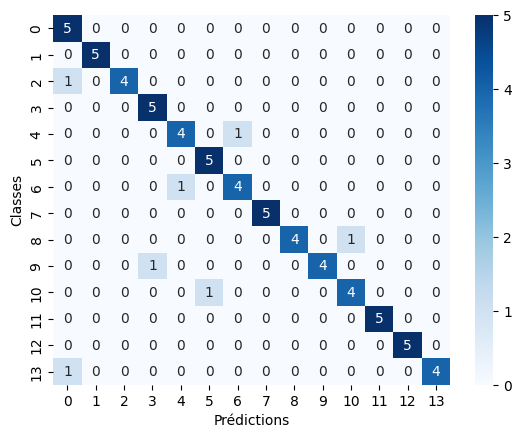

In [ ]:
y_pred = svm_model.predict(X_test)
y_pred_classes = y_pred
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Classes')
plt.savefig('cl4heatsvmc.png')
files.download('cl4heatsvmc.png')
plt.show()
